# Neural regression

The point of this experiment is to see if the numbers randomly generated by a human being (kept in the file numbers.py) can be predicted using mathematics and various regression technique

In [66]:
import numpy as np
from matplotlib import pyplot
from datetime import datetime as dt
import json

### Visualizing the numbers

In [12]:
from data.numbers import numbers

Text(0.5, 1.0, 'Number of entries: 230. Range: 0-93')

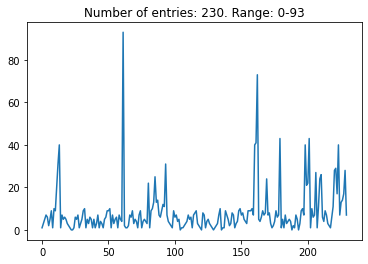

In [17]:
pyplot.plot(numbers)
pyplot.title('Number of entries: {0}. Range: {1}-{2}'.format(*[len(numbers), min(numbers), max(numbers)]))

### Specify the parameters

In [82]:
train_endpoint = int(len(numbers)*0.7) + 1 # Using 70% for training

x_train = np.array(range(1, train_endpoint+1))
y_train = np.array(numbers[:train_endpoint])

x_test = np.array(range(train_endpoint, len(numbers)))
y_test = np.array(numbers[train_endpoint:])

tested_degrees = range(1, 101) # Use polynomials with degrees from 2 to 100

output_dir = 'data/output.txt'
polydata_dir = 'data/polydata.json'

min_effectiveness = 0.5 # Any polynomial that performs equally or better than this value will be saved
soft_performance_bound = 1

print('Length of training dataset - {0}\nLength of testing dataset - {1}'.format(*[len(y_train), len(y_test)]))

Length of training dataset - 162
Length of testing dataset - 68


### Define functions to periodically save progress

In [67]:
def log(string, use_separators=True):
    with open(output_dir, 'a+') as file:
        separators = '=' * 70 if use_separators else ''
        file.write(string + '\n' + separators + '\n')
def save_polydata(degree, coefficients):
    with open(polydata_dir, 'w+') as file:
        jsn = dict(json.load(file))
        if degree in list(jsn.keys()):
            print(f'There is already an entry for the degree {degree}. Overwriting...')
        jsn[degree] = coefficients
        json.save(jsn, file)
def clear_file():
    open(output_dir, 'w+').close()
    print('File cleared\n')

In [84]:
clear_file()

total_start_time = dt.now()
performed_poorly = dict()
performed_sufficiently = dict()

print(f'Starting time - {total_start_time}\n')
log(f'Starting time - {total_start_time}', False)

for degree in tested_degrees:
    start_time = dt.now()
    print('='*5,'Using polynomial with degree ',degree,'='*5)
    log(f'\t[{dt.now()}] Using polynomial with degree {degree}')
    
    model = np.polynomial.polynomial.Polynomial.fit(x_train, y_train, deg=degree)
    poly = np.poly1d(model.convert().coef)
    
    strict_matches = 0 # Strict performance measures the number of cases when the model predicted the number exactly (1=1, 2=2)
    soft_matches = 0 # Soft performance measures the number of cases when the model predicted the number NOT EXACTLY, but within allowed bounds
    total_cases = 0
    for (x, y) in zip(x_test, y_test):
        total_cases += 1
        result = poly(x)
        if result == y:
            strict_matches += 1
        elif abs(result - y) <= soft_performance_bound:
            soft_matches += 1
            
    strict_performance = ( strict_matches / total_cases ) * 100
    soft_performance = ( soft_matches / total_cases ) * 100
    
    if any([strict_performance >= min_effectiveness, soft_performance >= min_effectiveness]):
        performed_sufficiently[degree] = {'strict_performance': strict_performance, 'soft_performance': soft_performance}
        print(f'\tModel with degree {degree} performes well enough:\n\t\tStrict performance: {strict_performance}%\n\t\tSoft performance: {soft_performance}%')
        save_polydata(degree, poly)
        log(f'\tModel with degree {degree} performes well enough:\n\t\tStrict performance: {strict_performance}%\n\t\tSoft performance: {soft_performance}%')
    else:
        print('\tModel performes poorly\n')
        
    end_time = dt.now()
    elapsed_time = end_time - start_time
    print(f'Elapsed: {elapsed_time}\n')

File cleared

Starting time - 2020-12-23 12:56:37.314341

===== Using polynomial with degree  1 =====
	Model performes poorly

Elapsed: 0:00:00.005820

===== Using polynomial with degree  2 =====
	Model performes poorly

Elapsed: 0:00:00.005892

===== Using polynomial with degree  3 =====
	Model performes poorly

Elapsed: 0:00:00.006358

===== Using polynomial with degree  4 =====
	Model performes poorly

Elapsed: 0:00:00.003700

===== Using polynomial with degree  5 =====
	Model performes poorly

Elapsed: 0:00:00.004185

===== Using polynomial with degree  6 =====
	Model performes poorly

Elapsed: 0:00:00.003850

===== Using polynomial with degree  7 =====
	Model performes poorly

Elapsed: 0:00:00.003989

===== Using polynomial with degree  8 =====
	Model performes poorly

Elapsed: 0:00:00.004117

===== Using polynomial with degree  9 =====
	Model performes poorly

Elapsed: 0:00:00.004474

===== Using polynomial with degree  10 =====
	Model performes poorly

Elapsed: 0:00:00.004449

=

===== Using polynomial with degree  92 =====
	Model performes poorly

Elapsed: 0:00:00.058954

===== Using polynomial with degree  93 =====
	Model performes poorly

Elapsed: 0:00:00.040900

===== Using polynomial with degree  94 =====
	Model performes poorly

Elapsed: 0:00:00.039822

===== Using polynomial with degree  95 =====
	Model performes poorly

Elapsed: 0:00:00.043000

===== Using polynomial with degree  96 =====
	Model performes poorly

Elapsed: 0:00:00.056269

===== Using polynomial with degree  97 =====
	Model performes poorly

Elapsed: 0:00:00.045126

===== Using polynomial with degree  98 =====
	Model performes poorly

Elapsed: 0:00:00.072571

===== Using polynomial with degree  99 =====
	Model performes poorly

Elapsed: 0:00:00.050868

===== Using polynomial with degree  100 =====
	Model performes poorly

Elapsed: 0:00:00.037927

